# Assignment 4 - Homography

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import randrange

In [0]:
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

Reference: https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83

# Stitch two images (left and right)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f059506dd68>,
 Text(0.5, 1.0, 'left'))

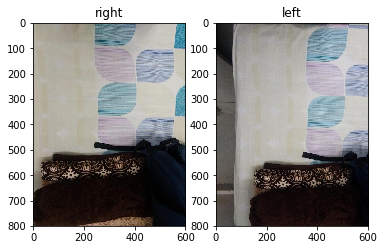

In [99]:
left = 1
right = 2
# read right image
img_ = cv2.imread(str(right)+'.jpg')
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img_, cv2.COLOR_RGB2GRAY)

# read left image
img = cv2.imread(str(left)+'.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# plot the left and right images
plt.subplot(121), plt.imshow(img_), plt.title("right")
plt.subplot(122), plt.imshow(img), plt.title("left")

(<matplotlib.image.AxesImage at 0x7f0594f55080>,
 Text(0.5, 1.0, 'Matching keypoints'))

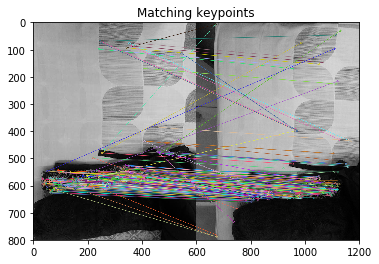

In [100]:
# compute the SIFT features
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# match the SIFT features
bf = cv2.BFMatcher()
matches12 = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good12 = []
for m in matches12:
     if m[0].distance < 0.5*m[1].distance:         
        good12.append(m)
matches12 = np.asarray(good12)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good12,None,flags=2)
plt.imshow(img3), plt.title("Matching keypoints")

Homography Matrix
 [[ 9.71805159e-01 -4.85714960e-02  1.55421646e+02]
 [ 4.29576107e-02  9.93348477e-01  5.30277526e+01]
 [ 1.91193378e-05  4.49658368e-05  1.00000000e+00]]


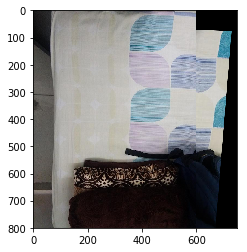

In [101]:
# compute the homography matrix
if len(matches12[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches12[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches12[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    print("Homography Matrix\n", H)
else:
    raise AssertionError("Can't find enough keypoints.")

overlap_ratio = 1.5
# compute the stictched image of the two images    
dst = cv2.warpPerspective(img_,H,(int((overlap_ratio*img.shape[1] + img_.shape[1])/2), img.shape[0]))
# plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
dst[0:img.shape[0], 0:img.shape[1]] = img
# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

# Define function to stitch two images

In [0]:
# accepts name of left and right image
def stitch(img_left, img_right, overlap_ratio):
    left = 1
    right = 2
    # read right image
    img_ = cv2.imread(str(img_right)+'.jpg')
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img1 = cv2.cvtColor(img_, cv2.COLOR_RGB2GRAY)

    # read left image
    img = cv2.imread(str(img_left)+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # compute the SIFT features
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # match the SIFT features
    bf = cv2.BFMatcher()
    matches12 = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good12 = []
    for m in matches12:
         if m[0].distance < 0.5*m[1].distance:         
            good12.append(m)
    matches12 = np.asarray(good12)

    # compute the homography matrix
    if len(matches12[:,0]) >= 4:
        src = np.float32([ kp1[m.queryIdx].pt for m in matches12[:,0] ]).reshape(-1,1,2)
        dst = np.float32([ kp2[m.trainIdx].pt for m in matches12[:,0] ]).reshape(-1,1,2)
        H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
        print("Homography Matrix\n", H)
    else:
        raise AssertionError("Can't find enough keypoints.")

    # compute the stictched image of the two images    
    dst = cv2.warpPerspective(img_,H,(int((overlap_ratio*img.shape[1] + img_.shape[1])/2), img.shape[0]))
    # plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
    dst[0:img.shape[0], 0:img.shape[1]] = img
    # plt.imshow(dst)
    return dst

In [0]:
# accepts left and right image directly
def stitch2(img_left, img_right, overlap_ratio):
    left = 1
    right = 2
    # read right image
    img_ = img_right
#     img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img1 = cv2.cvtColor(img_, cv2.COLOR_RGB2GRAY)

    # read left image
    img = img_left
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # compute the SIFT features
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # match the SIFT features
    bf = cv2.BFMatcher()
    matches12 = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good12 = []
    for m in matches12:
         if m[0].distance < 0.5*m[1].distance:         
            good12.append(m)
    matches12 = np.asarray(good12)

    # compute the homography matrix
    if len(matches12[:,0]) >= 4:
        src = np.float32([ kp1[m.queryIdx].pt for m in matches12[:,0] ]).reshape(-1,1,2)
        dst = np.float32([ kp2[m.trainIdx].pt for m in matches12[:,0] ]).reshape(-1,1,2)
        H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
        print("Homography Matrix\n", H)
    else:
        raise AssertionError("Can't find enough keypoints.")

    # compute the stictched image of the two images    
    dst = cv2.warpPerspective(img_,H,(int((overlap_ratio*img.shape[1] + img_.shape[1])/2), img.shape[0]))
    # plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
    dst[0:img.shape[0], 0:img.shape[1]] = img
    # plt.imshow(dst)
    return dst

# Use function defined to stitch image pairwise

Homography Matrix
 [[ 9.71805159e-01 -4.85714960e-02  1.55421646e+02]
 [ 4.29576107e-02  9.93348477e-01  5.30277526e+01]
 [ 1.91193378e-05  4.49658368e-05  1.00000000e+00]]


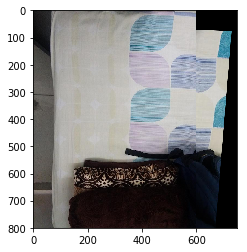

In [116]:
img_12 = stitch(1, 2, 1.5)
plt.imshow(img_12)

Homography Matrix
 [[ 1.07395686e+00  1.89101746e-01  1.22979391e+02]
 [ 4.97121370e-02  1.10877469e+00 -2.30679536e+01]
 [ 1.03132385e-04  7.20876711e-05  1.00000000e+00]]


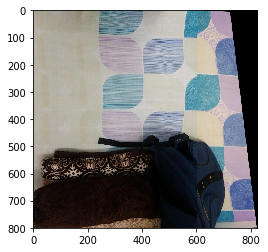

In [118]:
img_23 = stitch(2, 3, 1.75)
plt.imshow(img_23)

Homography Matrix
 [[ 9.51274042e-01 -2.25394007e-02  3.03118363e+02]
 [-1.41861910e-02  9.98660107e-01 -5.27045743e+00]
 [-4.09888604e-05  4.48044240e-05  1.00000000e+00]]


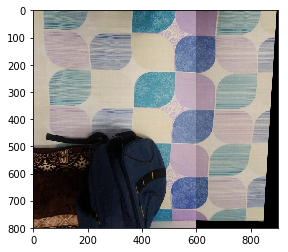

In [119]:
img_34 = stitch(3, 4, 2)
plt.imshow(img_34)

Homography Matrix
 [[ 9.45311359e-01 -1.68833562e-02  3.27649185e+02]
 [-2.35233102e-02  9.93840076e-01 -1.25208478e+01]
 [-4.86667424e-05  3.78032002e-06  1.00000000e+00]]


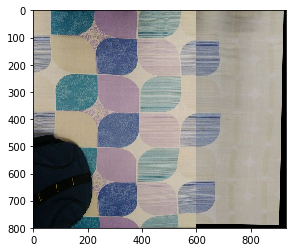

In [121]:
img_45 = stitch(4, 5, 2.1)
plt.imshow(img_45)

# Further stitch images obtained in previous step

Homography Matrix
 [[ 9.62637253e-01 -4.96006402e-02  1.56347911e+02]
 [ 3.49362151e-02  9.84439307e-01  5.71874684e+01]
 [ 8.43692140e-06  4.13902746e-05  1.00000000e+00]]


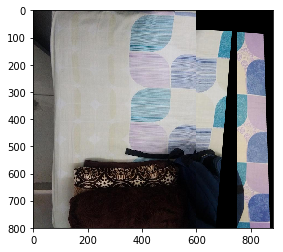

In [127]:
img_13 = stitch2(img_12, img_23, 1.25)
plt.imshow(img_13)

Homography Matrix
 [[ 9.50950240e-01 -2.23562942e-02  3.03088348e+02]
 [-1.42438777e-02  9.98390491e-01 -5.25326415e+00]
 [-4.16835476e-05  4.49915041e-05  1.00000000e+00]]


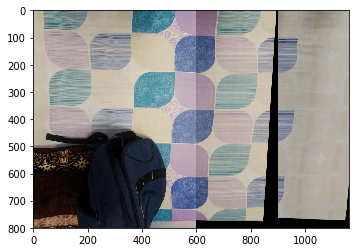

In [132]:
img_35 = stitch2(img_34, img_45, 1.55)
plt.imshow(img_35)

# The final panorama image

Homography Matrix
 [[1.06371813e+00 1.39793004e-01 2.74723063e+02]
 [1.02631555e-01 1.11220320e+00 3.41967828e+01]
 [1.32140769e-04 1.21091838e-04 1.00000000e+00]]


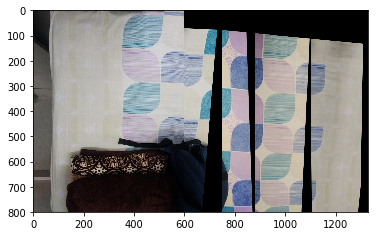

In [136]:
img_15 = stitch2(img_13, img_35, 1.7)
plt.imshow(img_15)